In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
# 这里直接引入sklearn里的数据集，iris鸢尾花
from sklearn.datasets import load_iris 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['class'] = iris.target
df['class'] = df['class'].map({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})
df.head(10)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
type(iris_X)

numpy.ndarray

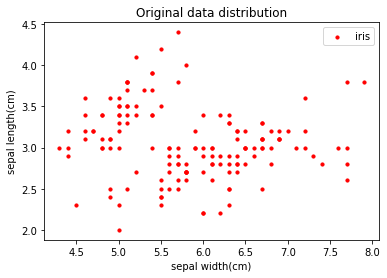

In [3]:
plt.scatter(iris_X[:,0],iris_X[:,1],label='iris',marker='o',c='red',s=10)
plt.xlabel('sepal width(cm)')
plt.ylabel('sepal length(cm)')
plt.title("Original data distribution")
plt.legend()
plt.show()

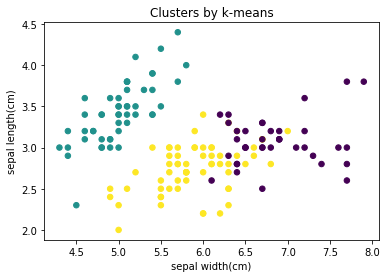

In [3]:
lris_df = datasets.load_iris()
x_axis = lris_df.data[:,0]
y_axis = lris_df.data[:,1]

# 分3类
model = KMeans(n_clusters=3)
 
#训练模型
model.fit(lris_df.data)
 
#预测全部150条数据
result = model.predict(lris_df.data)

#打印出来对150条数据的聚类散点图
plt.scatter(x_axis, y_axis,  c=result, marker='o', s=30)
plt.xlabel('sepal width(cm)')
plt.ylabel('sepal length(cm)')
plt.title("Clusters by k-means")
plt.show()

/home/cyj/miniconda3/envs/data/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


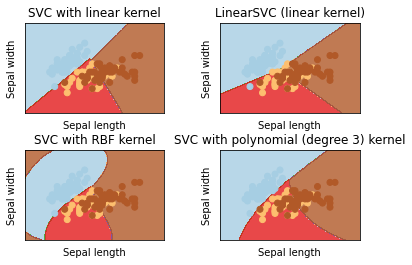

In [5]:
from sklearn import svm

# 导入数据集
iris = load_iris()
X = iris.data[:, :2]  # 只取前两维特征
y = iris.target

h = .02  # 网格中的步长

# 创建支持向量机实例，并拟合出数据
C = 1.0  # SVM正则化参数
svc = svm.SVC(kernel='linear', C=C).fit(X, y) # 线性核
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y) # 径向基核
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y) # 多项式核
lin_svc = svm.LinearSVC(C=C).fit(X, y) #线性核

# 创建网格，以绘制图像
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 图的标题
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # 绘出决策边界，不同的区域分配不同的颜色
    plt.subplot(2, 2, i + 1) # 创建一个2行2列的图，并以第i个图为当前图
    plt.subplots_adjust(wspace=0.4, hspace=0.4) # 设置子图间隔

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #将xx和yy中的元素组成一对对坐标，作为支持向量机的输入，返回一个array
    
    # 把分类结果绘制出来
    Z = Z.reshape(xx.shape) #(220, 280)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) #使用等高线的函数将不同的区域绘制出来

    # 将训练数据以离散点的形式绘制出来
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()
